# 1D Time-Independent Schrödinger Equation

This notebook demonstrates the solution of the 1D time-independent Schrödinger equation for different potential functions. We will solve the Schrödinger equation numerically using finite differences and visualize the potential, eigenfunctions, probability densities, and energy levels. We assume $ \hbar = 1 $ and $ L = 1 $ for simplifying calculations.

## Table of Contents

1. [Introduction](#Introduction)
2. [Import Libraries](#Import-Libraries)
3. [Define Constants and Grid](#Define-Constants-and-Grid)
4. [Function to Calculate Potential Matrix](#Function-to-Calculate-Potential-Matrix)
5. [Example 1: Infinite Potential Well](#Example-1:-Infinite-Potential-Well)
6. [Example 2: Gaussian Potential](#Example-2:-Gaussian-Potential)
7. [Example 3.1: Harmonic Oscillator Potential 1](#Example-3.1:-Harmonic-Oscillator-Potential-1)
8. [Example 3.2: Harmonic Oscillator Potential 2](#Example-3.2:-Harmonic-Oscillator-Potential-2)
9. [Conclusion](#Conclusion) (WIP)

## Introduction

We will set up a grid for the spatial domain and define the finite difference parameters (Discretization). By assuming $ \hbar = 1 $ and $L = 1$, we can simplify the Schrödinger equation into:

$$
-\frac{1}{2m} \frac{d^2 \psi}{dx^2} + V(x) \psi = E \psi
$$

For our numerical solution, we discretize this equation using finite differences.

## Import Libraries

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal
plt.style.use('fivethirtyeight')

## Define Constants and Grid

In [84]:
N = 200  # Number of grid points
dx = 1 / N  # Grid spacing
x = np.linspace(0, 1, N + 1)  # Spatial grid

`N = 200` sets the number of grid points to 200.

`dx = L / N` calculates the distance between adjacent grid points. Since the total length of the domain is assumed to be 1, `dx` is the length divided by the number of grid points.

`x = np.linspace(0, 1, N + 1)` creates an array of grid points from 0 to 1 with a total of `N + 1` points. This represents the spatial domain, which is assumed to be of length 1.


## Function to Calculate Potential Matrix

We define a function that calculates the potential matrix for a given potential function. The finite difference representation of the kinetic energy operator 
$\frac{d^2 \psi}{dx^2} $ is:

$$ \frac{d^2 \psi}{dx^2} \approx \frac{\psi_{i+1} - 2\psi_i + \psi_{i-1}}{dx^2} $$

This leads to a tridiagonal matrix (N x N) representation of the Hamiltonian.

$$
\begin{bmatrix}
\frac{1}{\Delta x^2} + mL^2 V_1 & -\frac{1}{2 \Delta x^2} & 0 & 0 \\
-\frac{1}{2 \Delta x^2} & \frac{1}{\Delta x^2} + mL^2 V_2 & -\frac{1}{2 \Delta x^2} & 0 \\
\vdots & \vdots & \vdots & \vdots \\
0 & 0 & -\frac{1}{2 \Delta x^2} & \frac{1}{\Delta x^2} + mL^2 V_{N-1} \\
\end{bmatrix}
\begin{bmatrix}
\psi_1 \\
\psi_2 \\
\vdots \\
\psi_{N-1}
\end{bmatrix}
= mL^2 E
\begin{bmatrix}
\psi_1 \\
\psi_2 \\
\vdots \\
\psi_{N-1}
\end{bmatrix}
$$

$$ \psi_0 = \psi_N = 0 $$

Note: there are N+1 terms of $\psi_i$


In [85]:
def potential_matrix(V):
    d = 1/dx**2 + V(x)[1:-1]
    e = -1/(2*dx**2) * np.ones(len(d)-1)
    return d, e

In this `potential_matrix` function, we construct the diagonal and off-diagonal elements of this Hamiltonian matrix.

- `d = 1/dx^2 + V(x)[1:-1]` computes the diagonal elements of the Hamiltonian matrix, which include the kinetic energy term $ 1/ \Delta x^2 $ and the potential energy term $ V(x) $.
- `e = -1/(2*dx**2) * np.ones(len(d)-1)` computes the off-diagonal elements, which represent the finite difference approximation of the second derivative.

The function returns the diagonal and off-diagonal elements of the tridiagonal Hamiltonian matrix.


# Example 1: Infinite Potential Well
In this example, we consider an infinite potential well where the potential is zero inside the well and infinite outside. This is a classic example used to illustrate the concept of quantized energy levels.

In [86]:
def infinite_potential_well(x):
    V = np.zeros_like(x)
    V[0] = V[-1] = np.inf
    return V

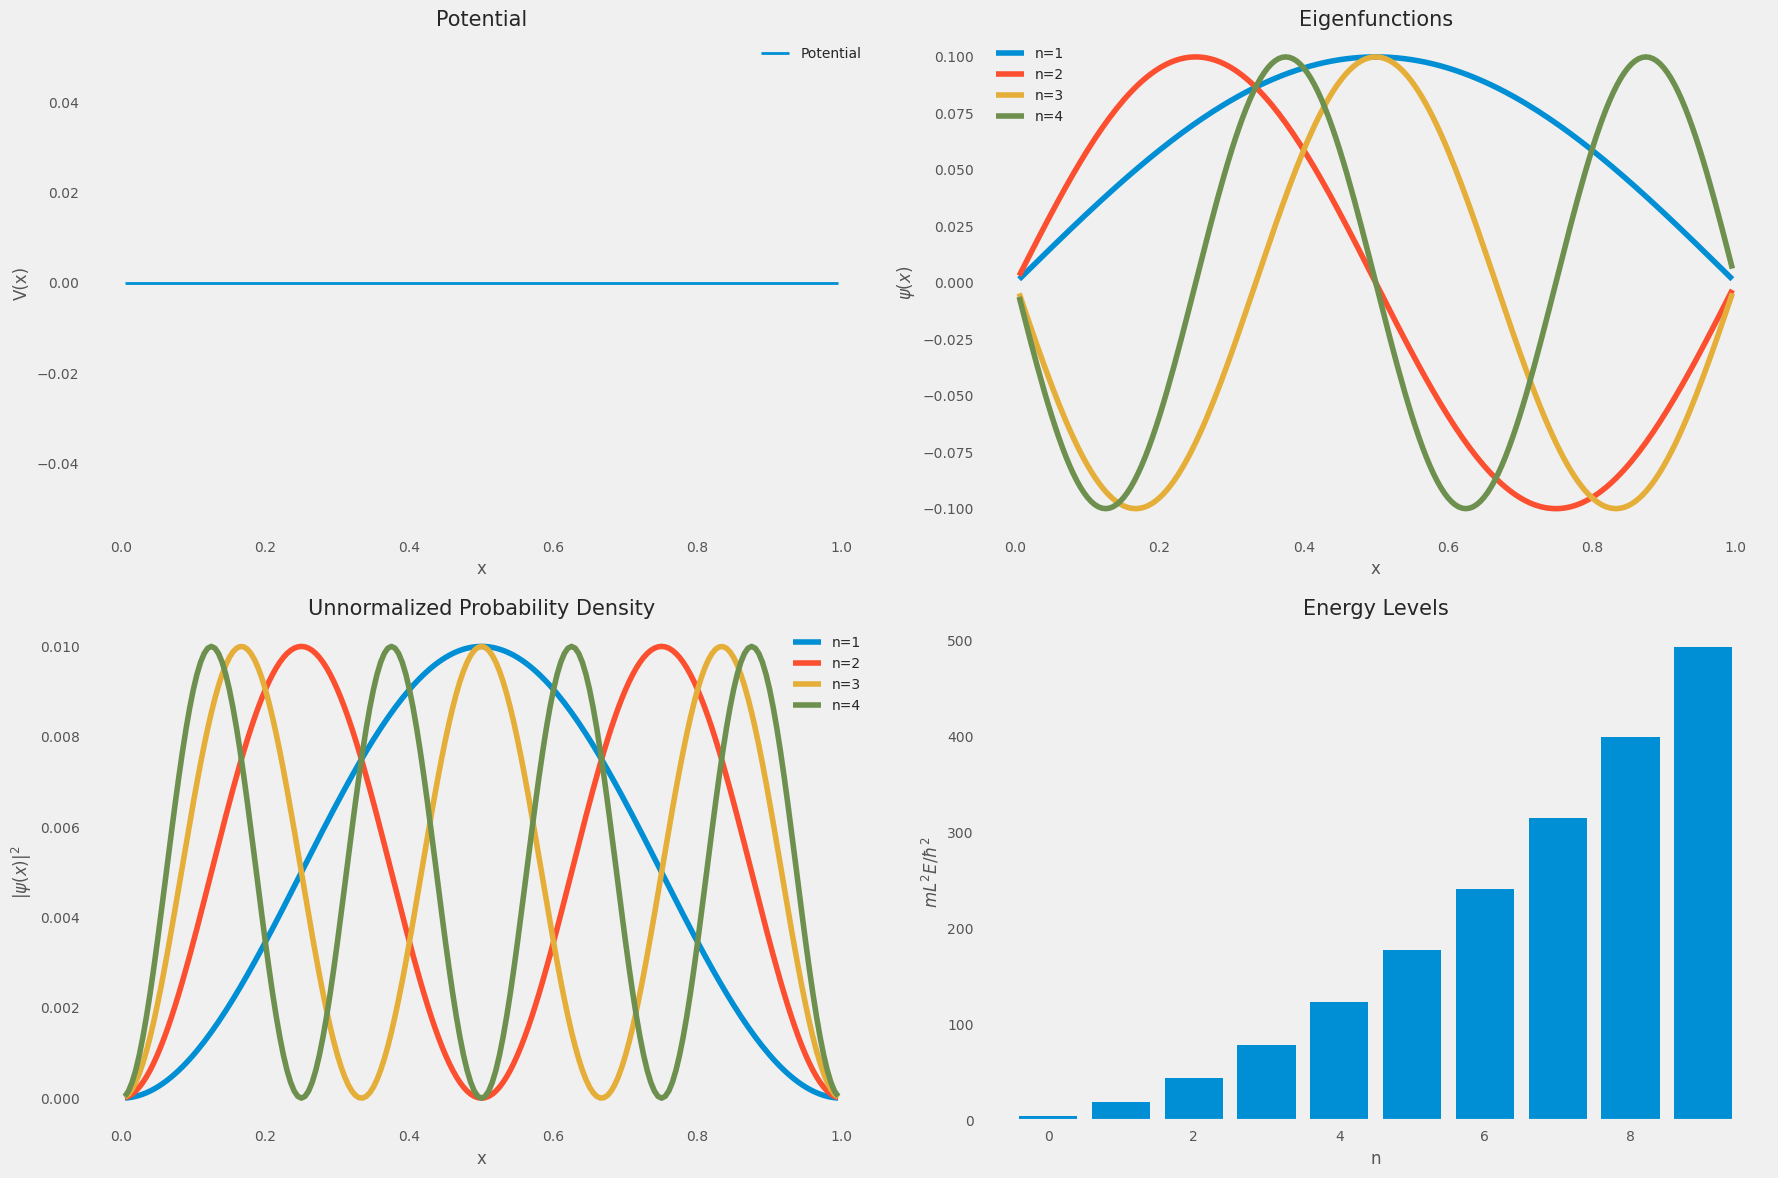

In [ ]:
# Calculate the potential matrix
d, e = potential_matrix(infinite_potential_well)

# Solve the eigenvalue problem using the tridiagonal matrix
 # The eigh_tridiagonal function returns two outputs:
  # - w: an array containing the eigenvalues, which represent the energy levels E_n of the quantum system.
  # - v: a matrix containing the eigenvectors, where each column corresponds to an eigenfunction ψ_n of the quantum system.
w, v = eigh_tridiagonal(d, e)

# Calculate probability density
prob_density = np.abs(v)**2


## Normalize probability density
#norm = np.trapz(prob_density**2, x[1:-1])  # Integral of probability density squared
#prob_density /= np.sqrt(norm)  # Normalize

# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Plot the potential
axs[0, 0].plot(x, infinite_potential_well(x), lw=2, label='Potential')
axs[0, 0].set_title('Potential', fontsize=15)
axs[0, 0].set_ylabel('V(x)', fontsize=12)
axs[0, 0].set_xlabel('x', fontsize=12)
axs[0, 0].legend()
axs[0, 0].grid()

# Plot the eigenfunctions
for i in range(4):
    axs[0, 1].plot(x[1:-1], v[:, i], label=f'n={i+1}')
axs[0, 1].set_title('Eigenfunctions', fontsize=15)
axs[0, 1].set_ylabel('$\psi(x)$', fontsize=12)
axs[0, 1].set_xlabel('x', fontsize=12)
axs[0, 1].legend()
axs[0, 1].grid()

# Plot probability density
for i in range(4):
    axs[1, 0].plot(x[1:-1], prob_density[:, i], label=f'n={i+1}')
axs[1, 0].set_title('Unnormalized Probability Density', fontsize=15)
axs[1, 0].set_ylabel('$|\psi(x)|^2$', fontsize=12)
axs[1, 0].set_xlabel('x', fontsize=12)
axs[1, 0].legend()
axs[1, 0].grid()

# Plot energy levels
axs[1, 1].bar(np.arange(0, 10, 1), w[:10])
axs[1, 1].set_title('Energy Levels', fontsize=15)
axs[1, 1].set_ylabel('$mL^2 E/\hbar^2$', fontsize=12)
axs[1, 1].set_xlabel('n', fontsize=12)
axs[1, 1].grid()

plt.tight_layout()
plt.show()

# Example 2: Gaussian Potential
In this example, we consider a Gaussian potential centered at 
$𝑥 = 0.7$. Gaussian potentials are often used to model localized perturbations or wells.

In [88]:
def gaussian_potential(x, center=0.7, width=0.05, height=1000):
    return height * np.exp(-((x - center)**2) / (2 * width**2))

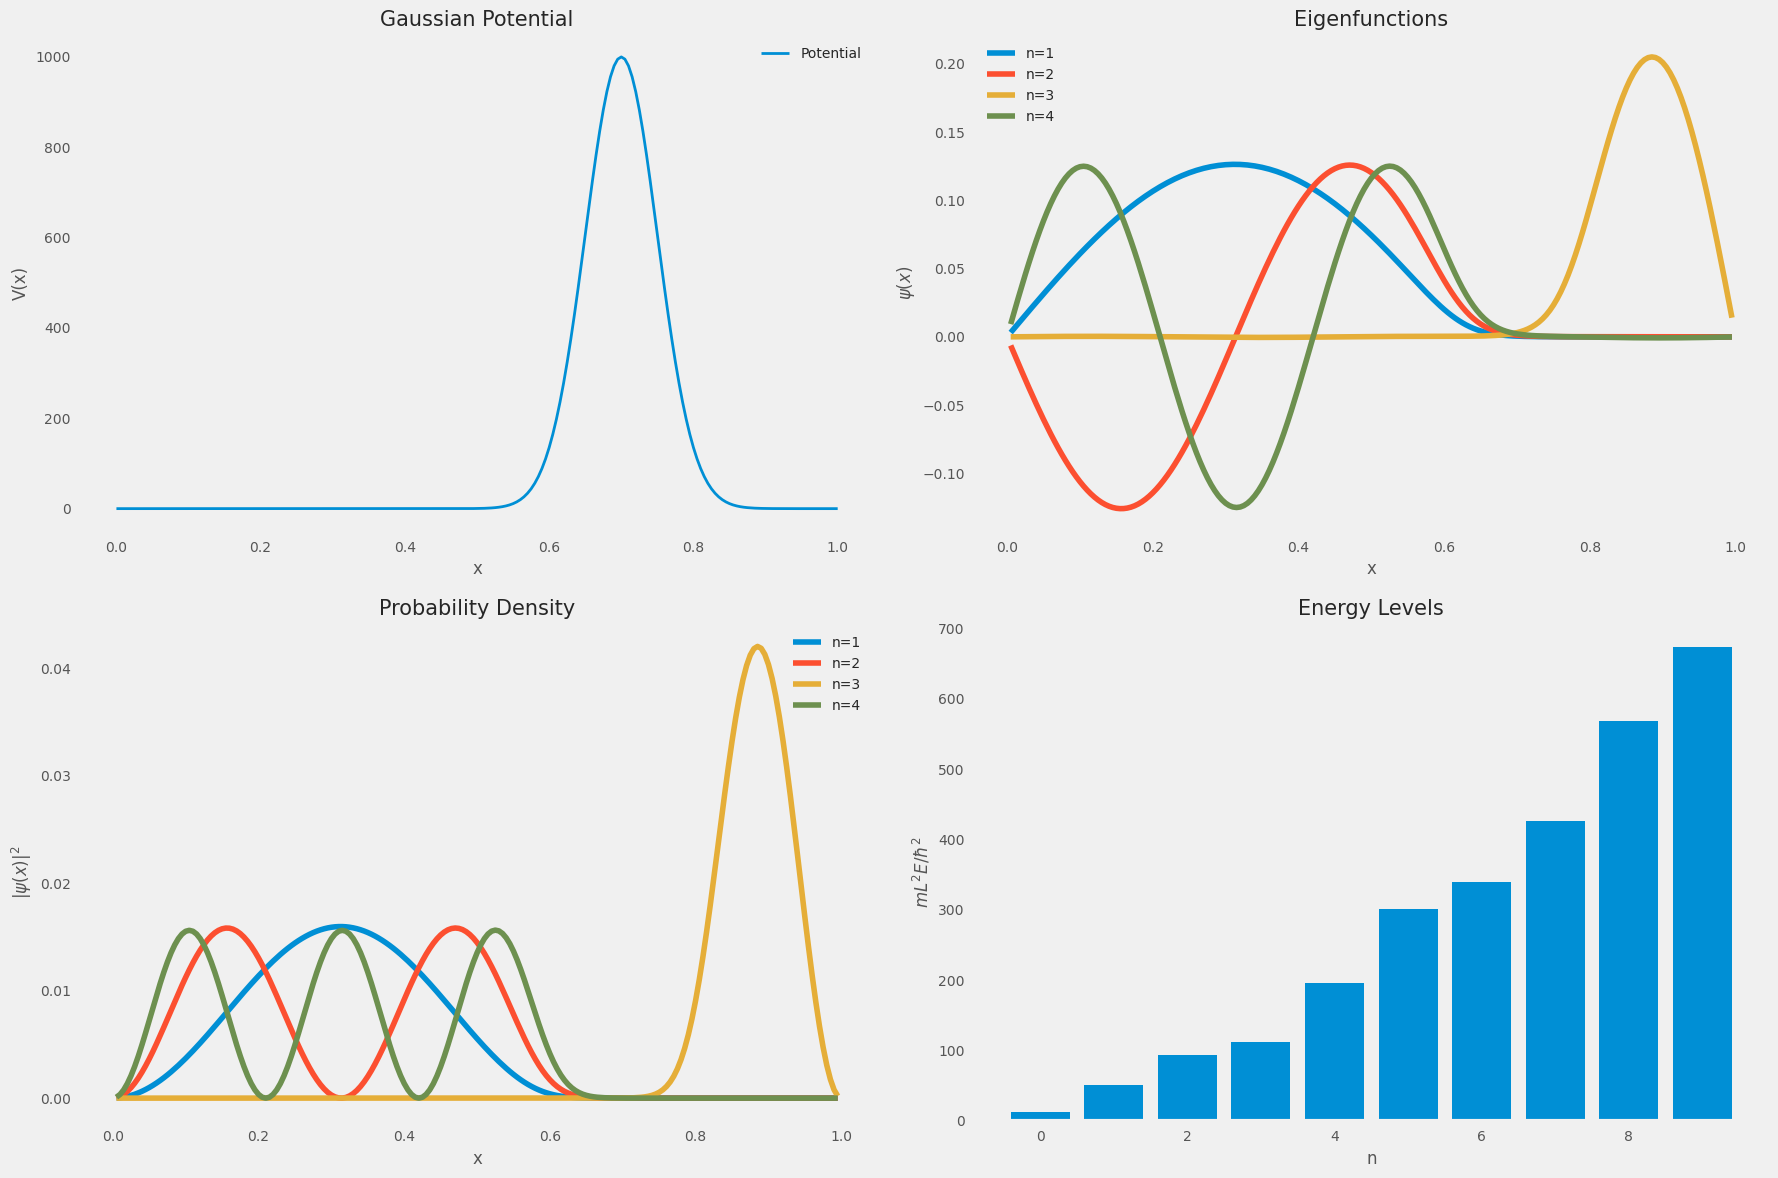

In [89]:
# Calculate the potential matrix
d, e = potential_matrix(gaussian_potential)

# Solve the eigenvalue problem
w, v = eigh_tridiagonal(d, e)

# Calculate probability density
prob_density = np.abs(v)**2

# Normalize probability density
#norm = np.trapz(prob_density**2, x[1:-1])  # Integral of probability density squared
#prob_density /= np.sqrt(norm)  # Normalize

# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Plot the potential
axs[0, 0].plot(x, gaussian_potential(x), lw=2, label='Potential')
axs[0, 0].set_title('Gaussian Potential', fontsize=15)
axs[0, 0].set_ylabel('V(x)', fontsize=12)
axs[0, 0].set_xlabel('x', fontsize=12)
axs[0, 0].legend()
axs[0, 0].grid()

# Plot the eigenfunctions
for i in range(4):
    axs[0, 1].plot(x[1:-1], v[:, i], label=f'n={i+1}')
axs[0, 1].set_title('Eigenfunctions', fontsize=15)
axs[0, 1].set_ylabel('$\psi(x)$', fontsize=12)
axs[0, 1].set_xlabel('x', fontsize=12)
axs[0, 1].legend()
axs[0, 1].grid()

# Plot probability density
for i in range(4):
    axs[1, 0].plot(x[1:-1], prob_density[:, i], label=f'n={i+1}')
axs[1, 0].set_title('Probability Density', fontsize=15)
axs[1, 0].set_ylabel('$|\psi(x)|^2$', fontsize=12)
axs[1, 0].set_xlabel('x', fontsize=12)
axs[1, 0].legend()
axs[1, 0].grid()

# Plot energy levels
axs[1, 1].bar(np.arange(0, 10, 1), w[:10])
axs[1, 1].set_title('Energy Levels', fontsize=15)
axs[1, 1].set_ylabel('$mL^2 E/\hbar^2$', fontsize=12) # hbar comes back again, trick to solve, first take 
axs[1, 1].set_xlabel('n', fontsize=12)
axs[1, 1].grid()

plt.tight_layout()
plt.show()

Notice these interesting behaviors of the Eigen functions:
- At n = 1, the eigenfunction is to the left of the Gaussian hill.
- At n = 2, it is also to the left of the Gaussian hill.
- However, at n = 3, the eigenfunction is now to the right of the Gaussian hill.
- At n = 4, it is again to the left of the Gaussian hill.


# Example 3.1: Harmonic Oscillator Potential 1
In this example, we consider a harmonic oscillator potential, which is quadratic in $x$. The harmonic oscillator is another classic quantum mechanical system with well-known solutions.

In [90]:
def harmonic_oscillator_potential(x, k=50):
    return 0.5 * k * (x - 0.5)**2
    

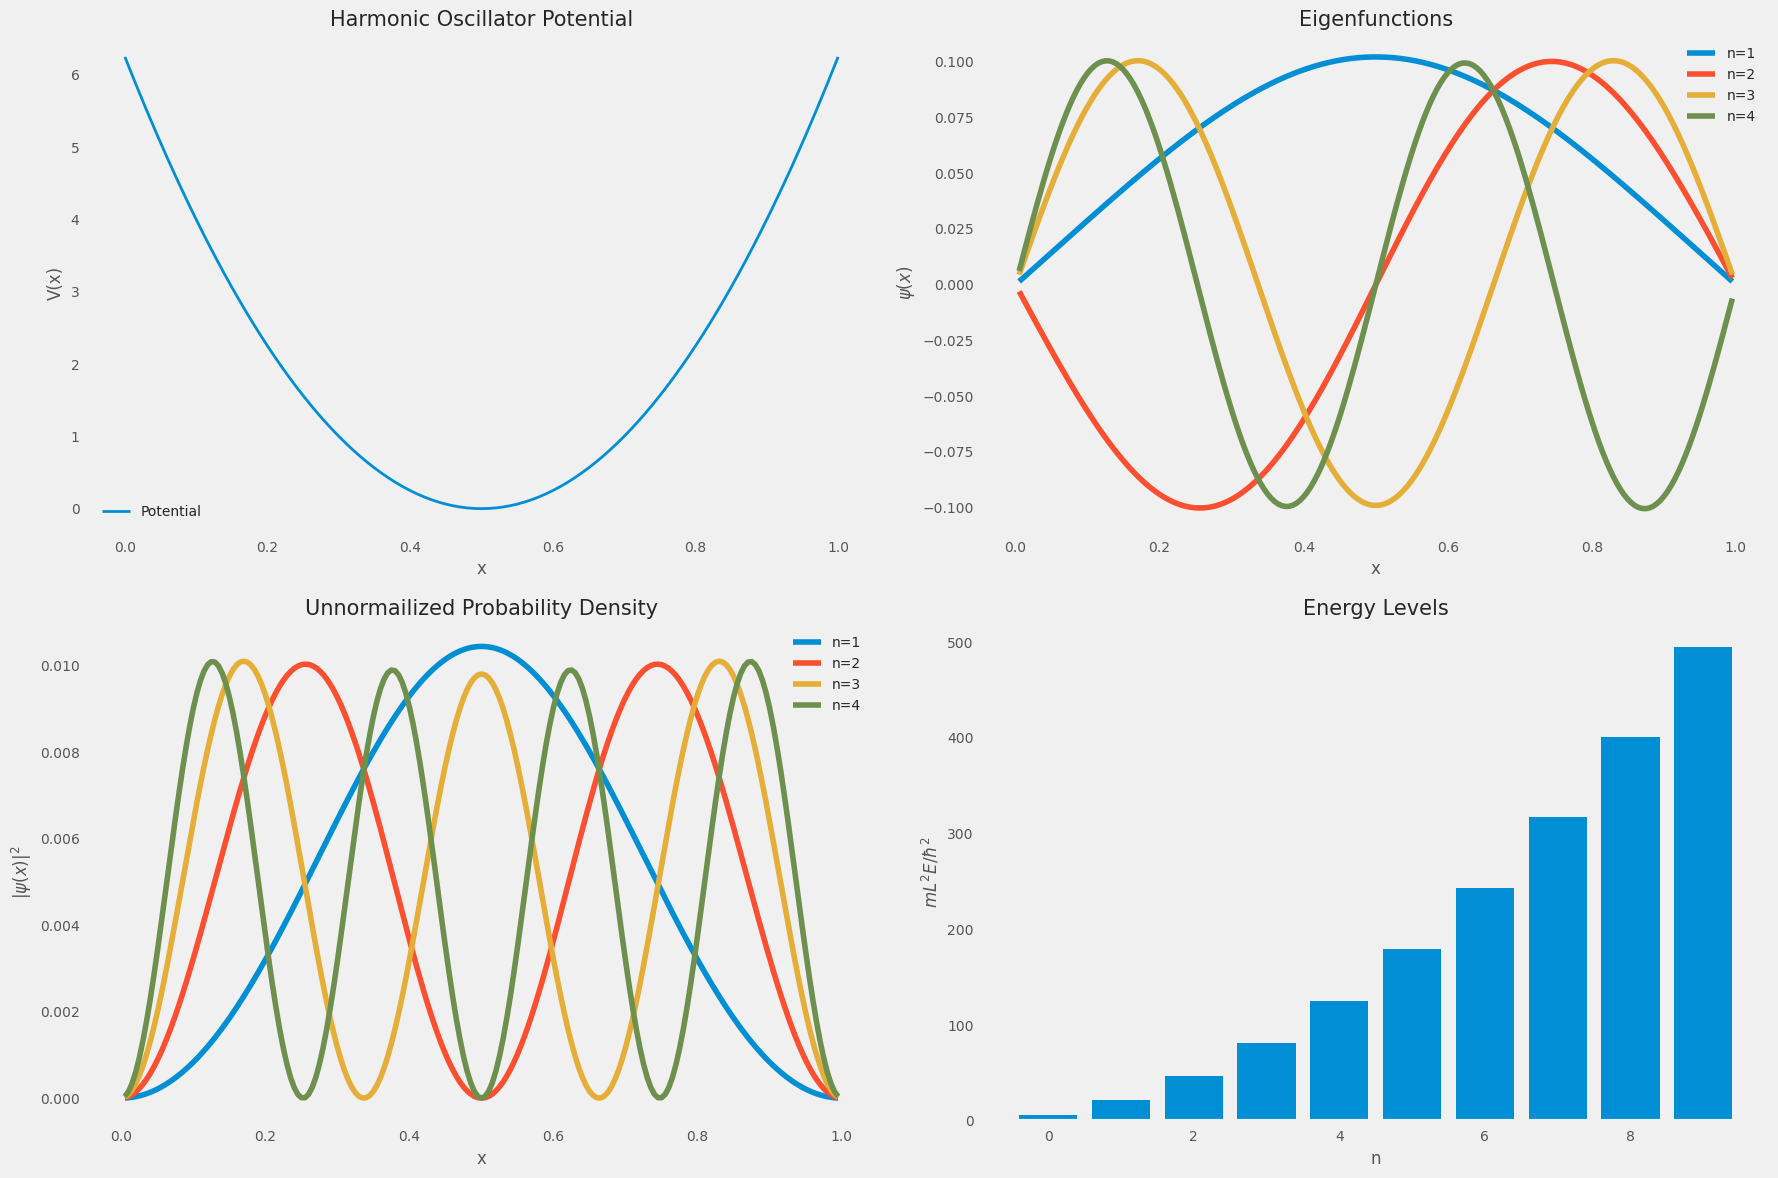

In [91]:
# Calculate the potential matrix
d, e = potential_matrix(harmonic_oscillator_potential)

# Solve the eigenvalue problem
w, v = eigh_tridiagonal(d, e)

# Calculate probability density
prob_density = np.abs(v)**2

# Normalize probability density
#norm = np.trapz(prob_density**2, x[1:-1])  # Integral of probability density squared
#prob_density /= np.sqrt(norm)  # Normalize

# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Plot the potential
axs[0, 0].plot(x, harmonic_oscillator_potential(x), lw=2, label='Potential')
axs[0, 0].set_title('Harmonic Oscillator Potential', fontsize=15)
axs[0, 0].set_ylabel('V(x)', fontsize=12)
axs[0, 0].set_xlabel('x', fontsize=12)
axs[0, 0].legend()
axs[0, 0].grid()

# Plot the eigenfunctions
for i in range(4):
    axs[0, 1].plot(x[1:-1], v[:, i], label=f'n={i+1}')
axs[0, 1].set_title('Eigenfunctions', fontsize=15)
axs[0, 1].set_ylabel('$\psi(x)$', fontsize=12)
axs[0, 1].set_xlabel('x', fontsize=12)
axs[0, 1].legend()
axs[0, 1].grid()

# Plot probability density
for i in range(4):
    axs[1,0].plot(x[1:-1], prob_density[:, i], label=f'n={i+1}')
axs[1, 0].set_title('Unnormailized Probability Density', fontsize=15)
axs[1, 0].set_ylabel('$|\psi(x)|^2$', fontsize=12)
axs[1, 0].set_xlabel('x', fontsize=12)
axs[1, 0].legend()
axs[1, 0].grid()

# Plot energy levels
axs[1, 1].bar(np.arange(0, 10, 1), w[:10])
axs[1, 1].set_title('Energy Levels', fontsize=15)
axs[1, 1].set_ylabel('$mL^2 E/\hbar^2$', fontsize=12)
axs[1, 1].set_xlabel('n', fontsize=12)
axs[1, 1].grid()

plt.tight_layout()
plt.show()

# Example 3.2: Harmonic Oscillator Potential 2 
In this example, we consider a reconsider a harmonic oscillator potential with a shift, which is quadratic in $x$. 
The harmonic oscillator is another classic quantum mechanical system with well-known solutions.

In [92]:
def harmonic_oscillator_potential(x, k=500):
    return k * (1 - 0.5 * (x - 0.5)**2)
    

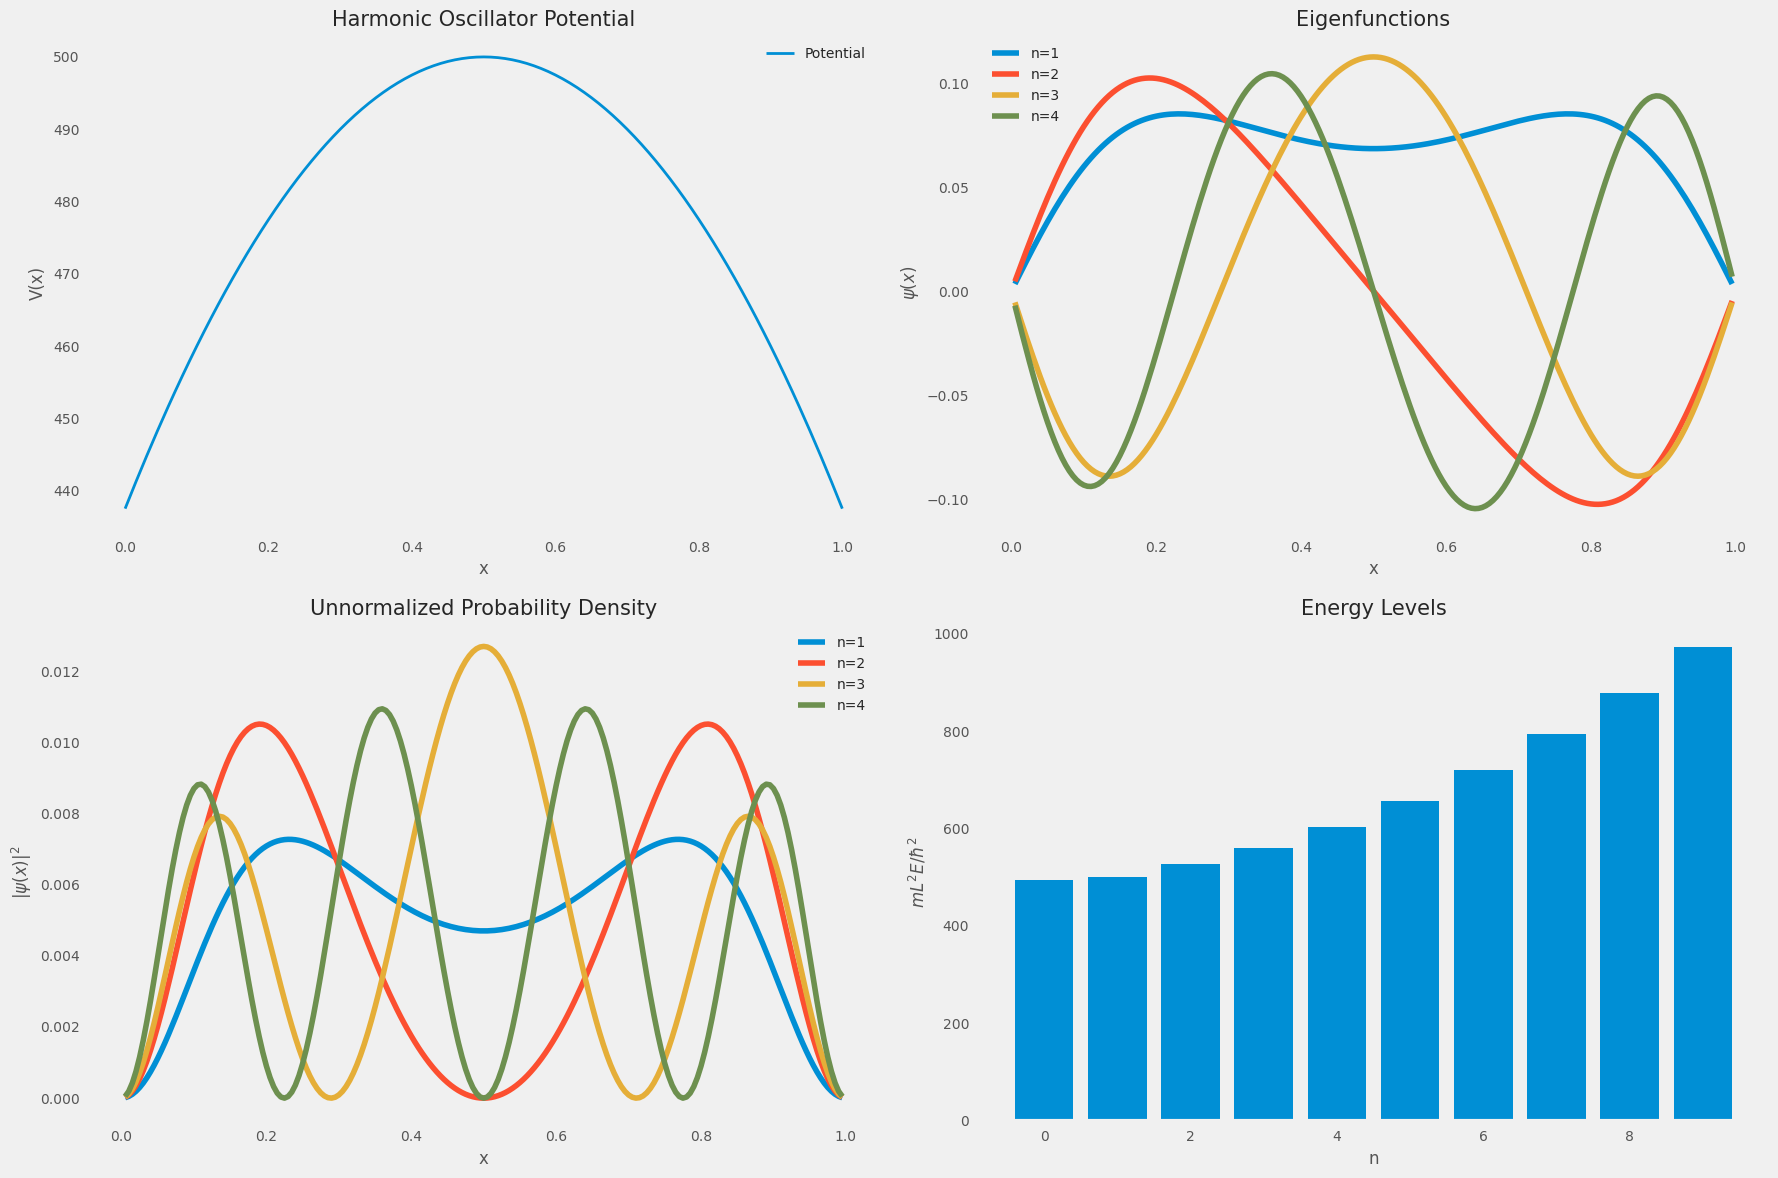

In [93]:
# Calculate the potential matrix
d, e = potential_matrix(harmonic_oscillator_potential)

# Solve the eigenvalue problem
w, v = eigh_tridiagonal(d, e)

# Calculate probability density
prob_density = np.abs(v)**2

# Normalize probability density
#norm = np.trapz(prob_density**2, x[1:-1])  # Integral of probability density squared
#prob_density /= np.sqrt(norm)  # Normalize

# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Plot the potential
axs[0, 0].plot(x, harmonic_oscillator_potential(x), lw=2, label='Potential')
axs[0, 0].set_title('Harmonic Oscillator Potential', fontsize=15)
axs[0, 0].set_ylabel('V(x)', fontsize=12)
axs[0, 0].set_xlabel('x', fontsize=12)
axs[0, 0].legend()
axs[0, 0].grid()

# Plot the eigenfunctions
for i in range(4):
    axs[0, 1].plot(x[1:-1], v[:, i], label=f'n={i+1}')
axs[0, 1].set_title('Eigenfunctions', fontsize=15)
axs[0, 1].set_ylabel('$\psi(x)$', fontsize=12)
axs[0, 1].set_xlabel('x', fontsize=12)
axs[0, 1].legend()
axs[0, 1].grid()

# Plot probability density
for i in range(4):
    axs[1,0].plot(x[1:-1], prob_density[:, i], label=f'n={i+1}')
axs[1, 0].set_title('Unnormalized Probability Density', fontsize=15)
axs[1, 0].set_ylabel('$|\psi(x)|^2$', fontsize=12)
axs[1, 0].set_xlabel('x', fontsize=12)
axs[1, 0].legend()
axs[1, 0].grid()

# Plot energy levels
axs[1, 1].bar(np.arange(0, 10, 1), w[:10])
axs[1, 1].set_title('Energy Levels', fontsize=15)
axs[1, 1].set_ylabel('$mL^2 E/\hbar^2$', fontsize=12)
axs[1, 1].set_xlabel('n', fontsize=12)
axs[1, 1].grid()

plt.tight_layout()
plt.show()